In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import SpectralClustering

index             int64
speechiness     float64
energy          float64
acousticness    float64
liveness        float64
valence         float64
tempo           float64
dtype: object


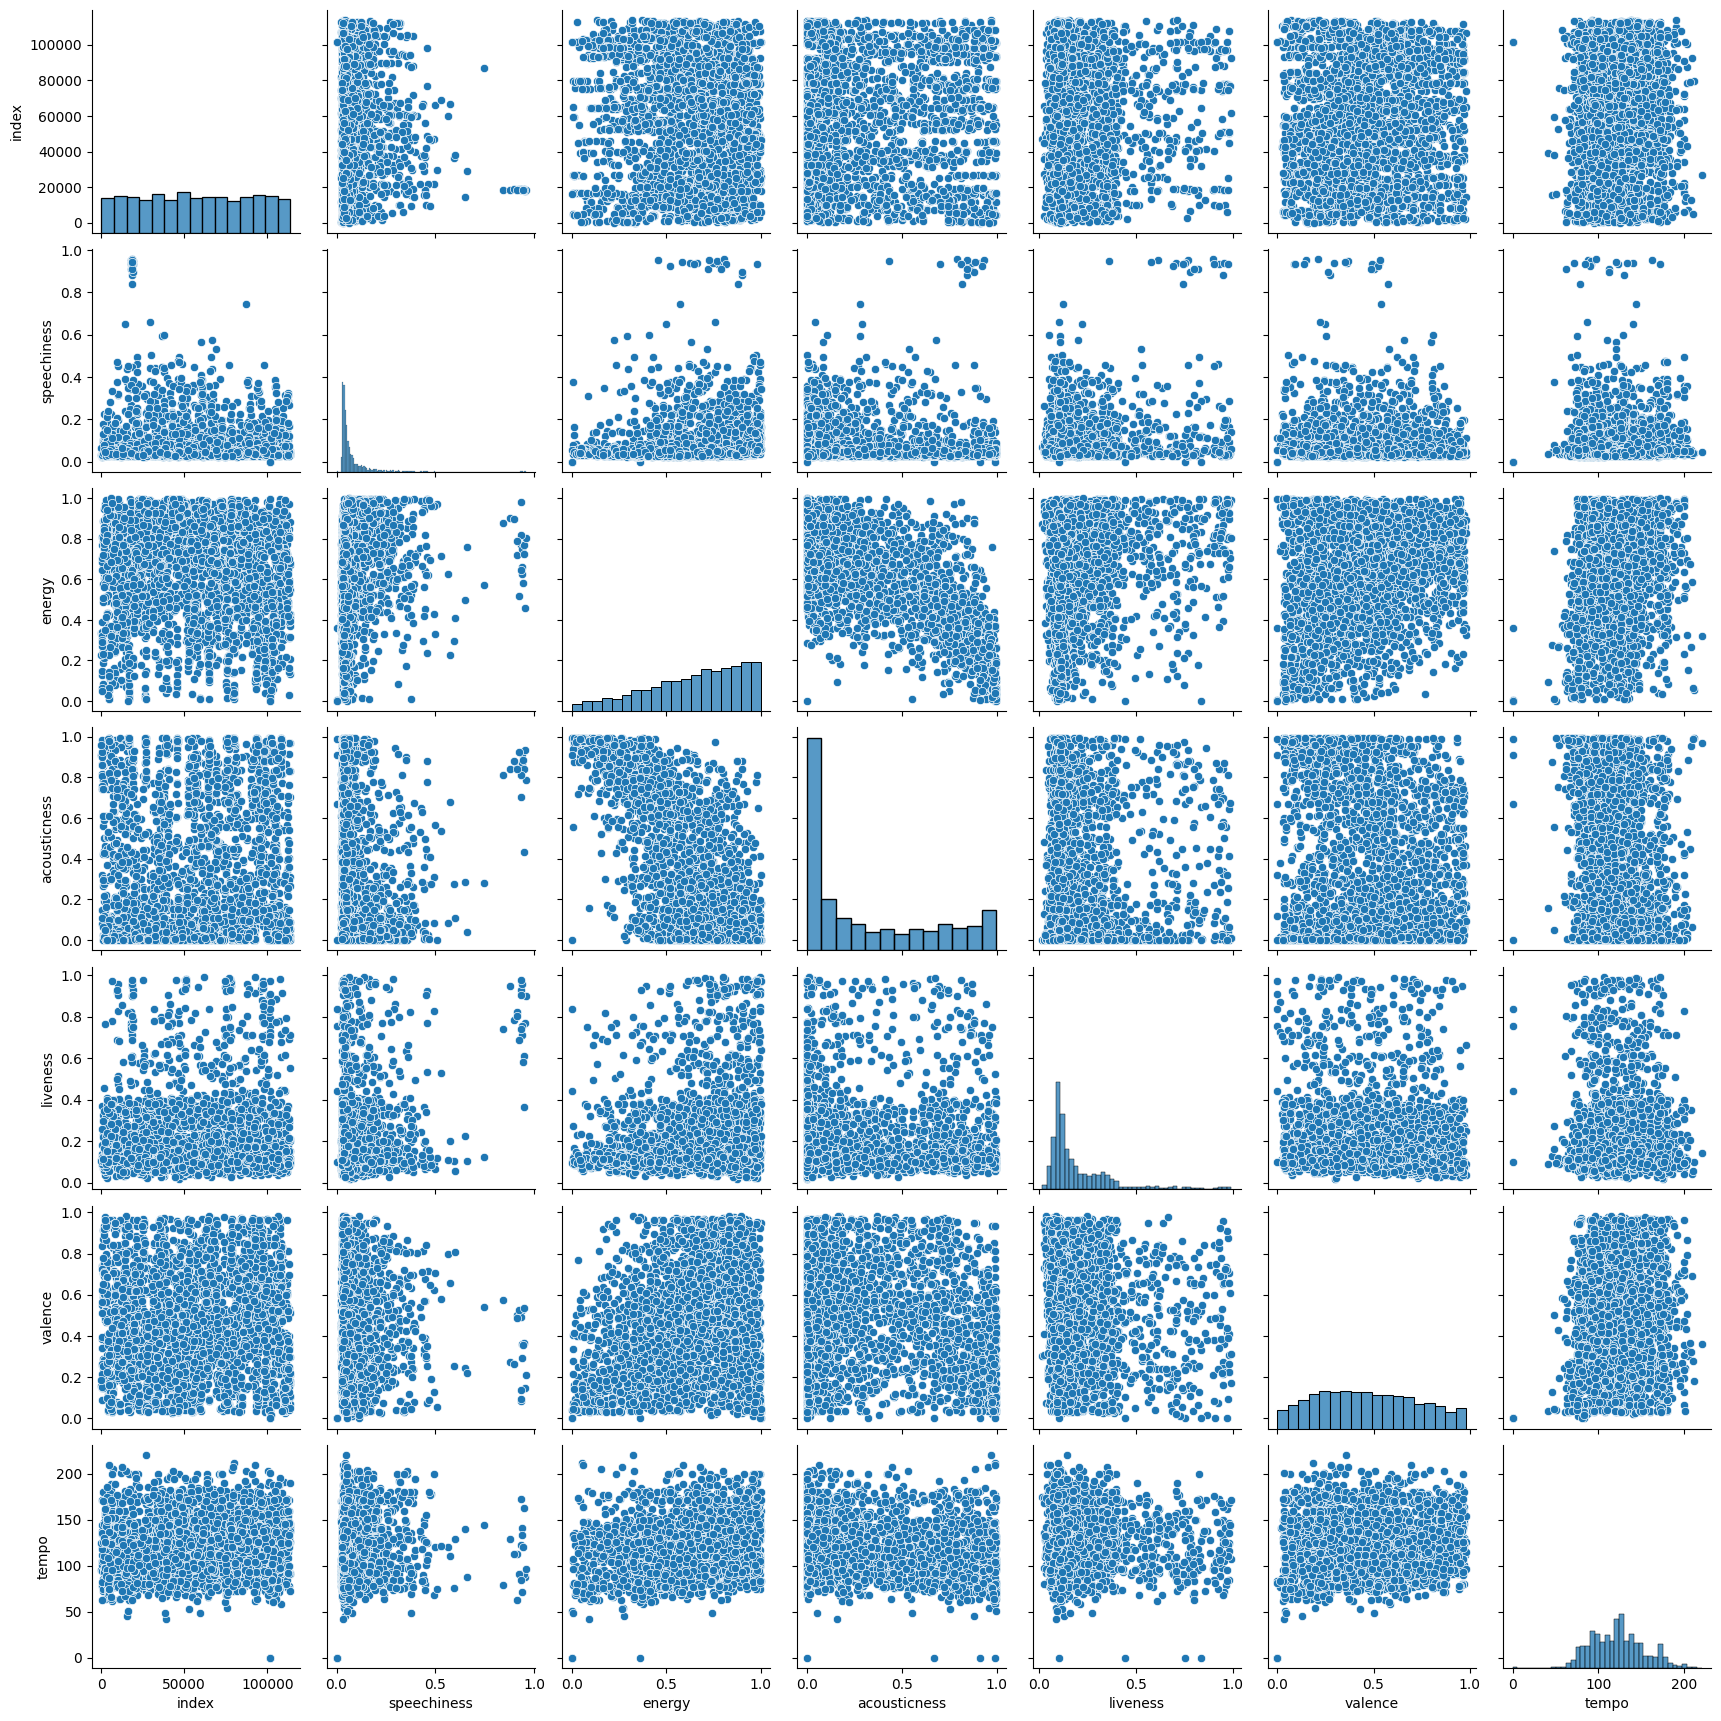

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/Spotify_dataset.csv")

df = df[['speechiness', 'energy', 'acousticness', 'liveness', 'valence', 'tempo']]

df = df.sample(3000)

df.reset_index(inplace=True)
print(df.dtypes)

sns.pairplot(df)



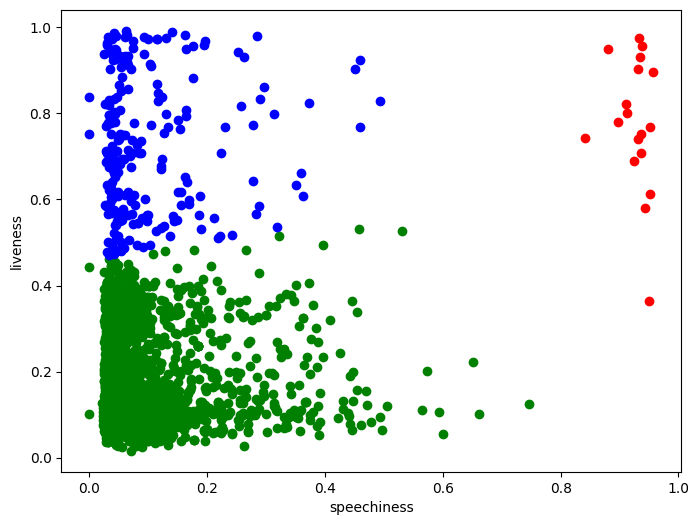

In [4]:
affinity = SpectralClustering(n_clusters=3)

clustering = affinity.fit(df[['speechiness', 'liveness']])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

colors = ['r', 'g', 'b']

for i in df.index:
    # print(clustering.labels_[i])
    ax.scatter(df["speechiness"][i], df['liveness'][i], color=colors[clustering.labels_[i]])

ax.set_xlabel('speechiness')
ax.set_ylabel('liveness')

df['cluster'] = clustering.labels_